<a href="https://colab.research.google.com/github/RabiAnjum09/codealpha_tasks/blob/main/CA_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK#2**

**UNEMPLOYMENT ANALYSIS WITH PYTHON**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
employment = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [ ]:
print(employment.head(0))

Empty DataFrame
Columns: [Region,  Date,  Frequency,  Estimated Unemployment Rate (%),  Estimated Employed,  Estimated Labour Participation Rate (%), Region.1, longitude, latitude]
Index: []


In [ ]:
employment.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [ ]:
print(employment.duplicated().sum())

0


In [ ]:
employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
employment[' Date'] = pd.to_datetime(employment[' Date'])
print(employment[' Date'].dtype)

datetime64[ns]


/tmp/ipython-input-798468800.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  employment[' Date'] = pd.to_datetime(employment[' Date'])




*   Below code plots a line chart showing how the estimated unemployment rate changes over time for different regions.



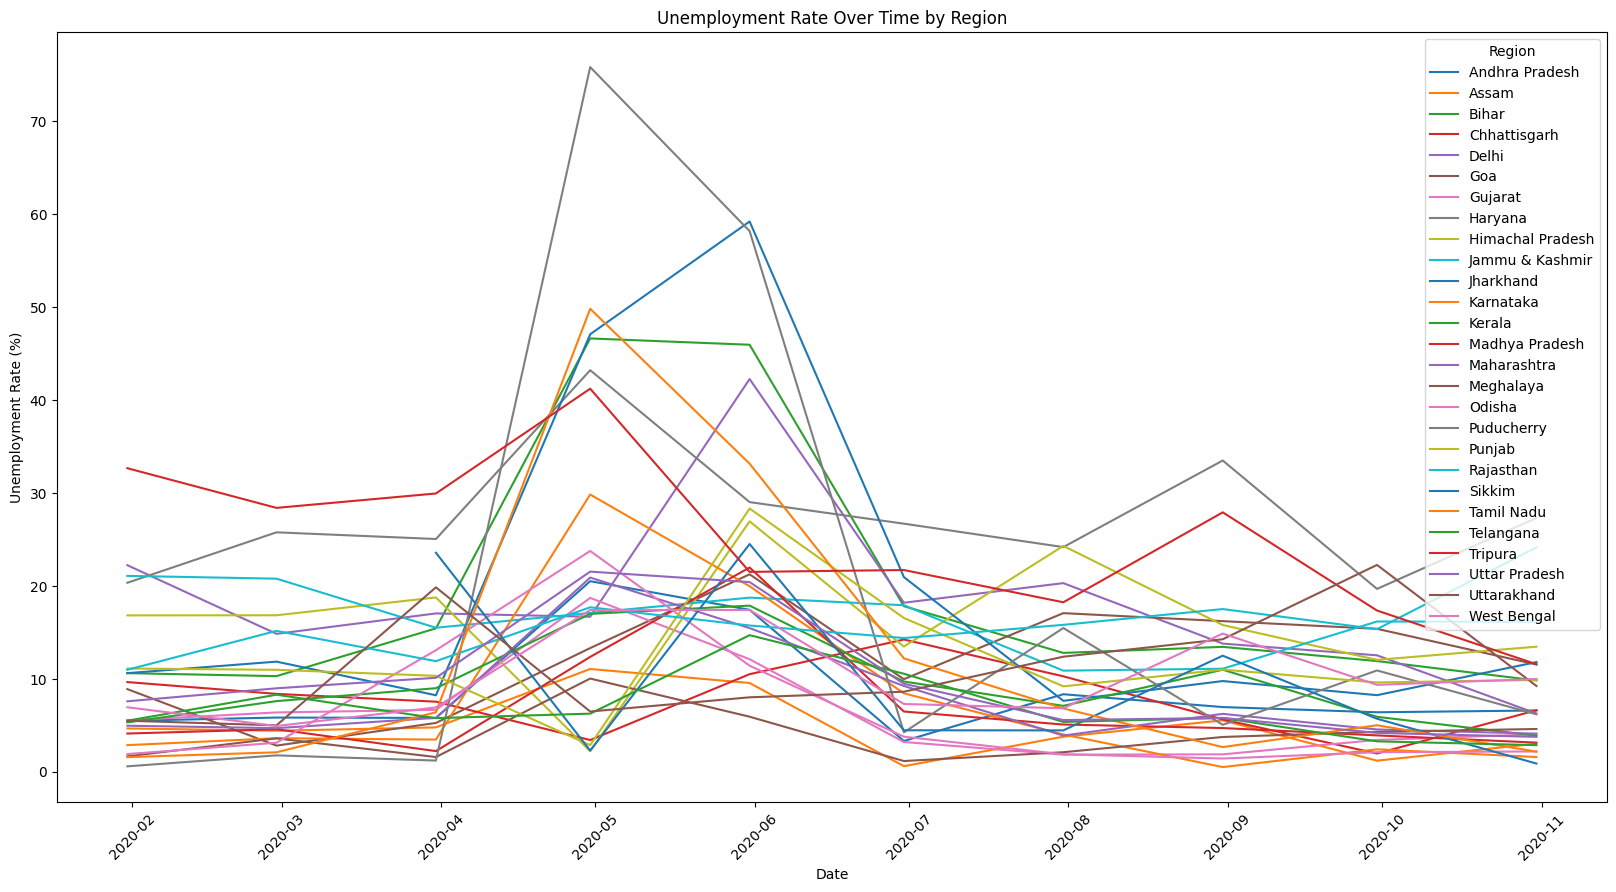

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=employment, x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region', palette='tab10')
plt.title('Unemployment Rate Over Time by Region')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()



*   Below code plots a line chart of unemployment rates over time by region and adds a black overall trend line based on the average unemployment rate across all regions using linear regression.
*  The trend line highlights the general direction of unemployment over time.


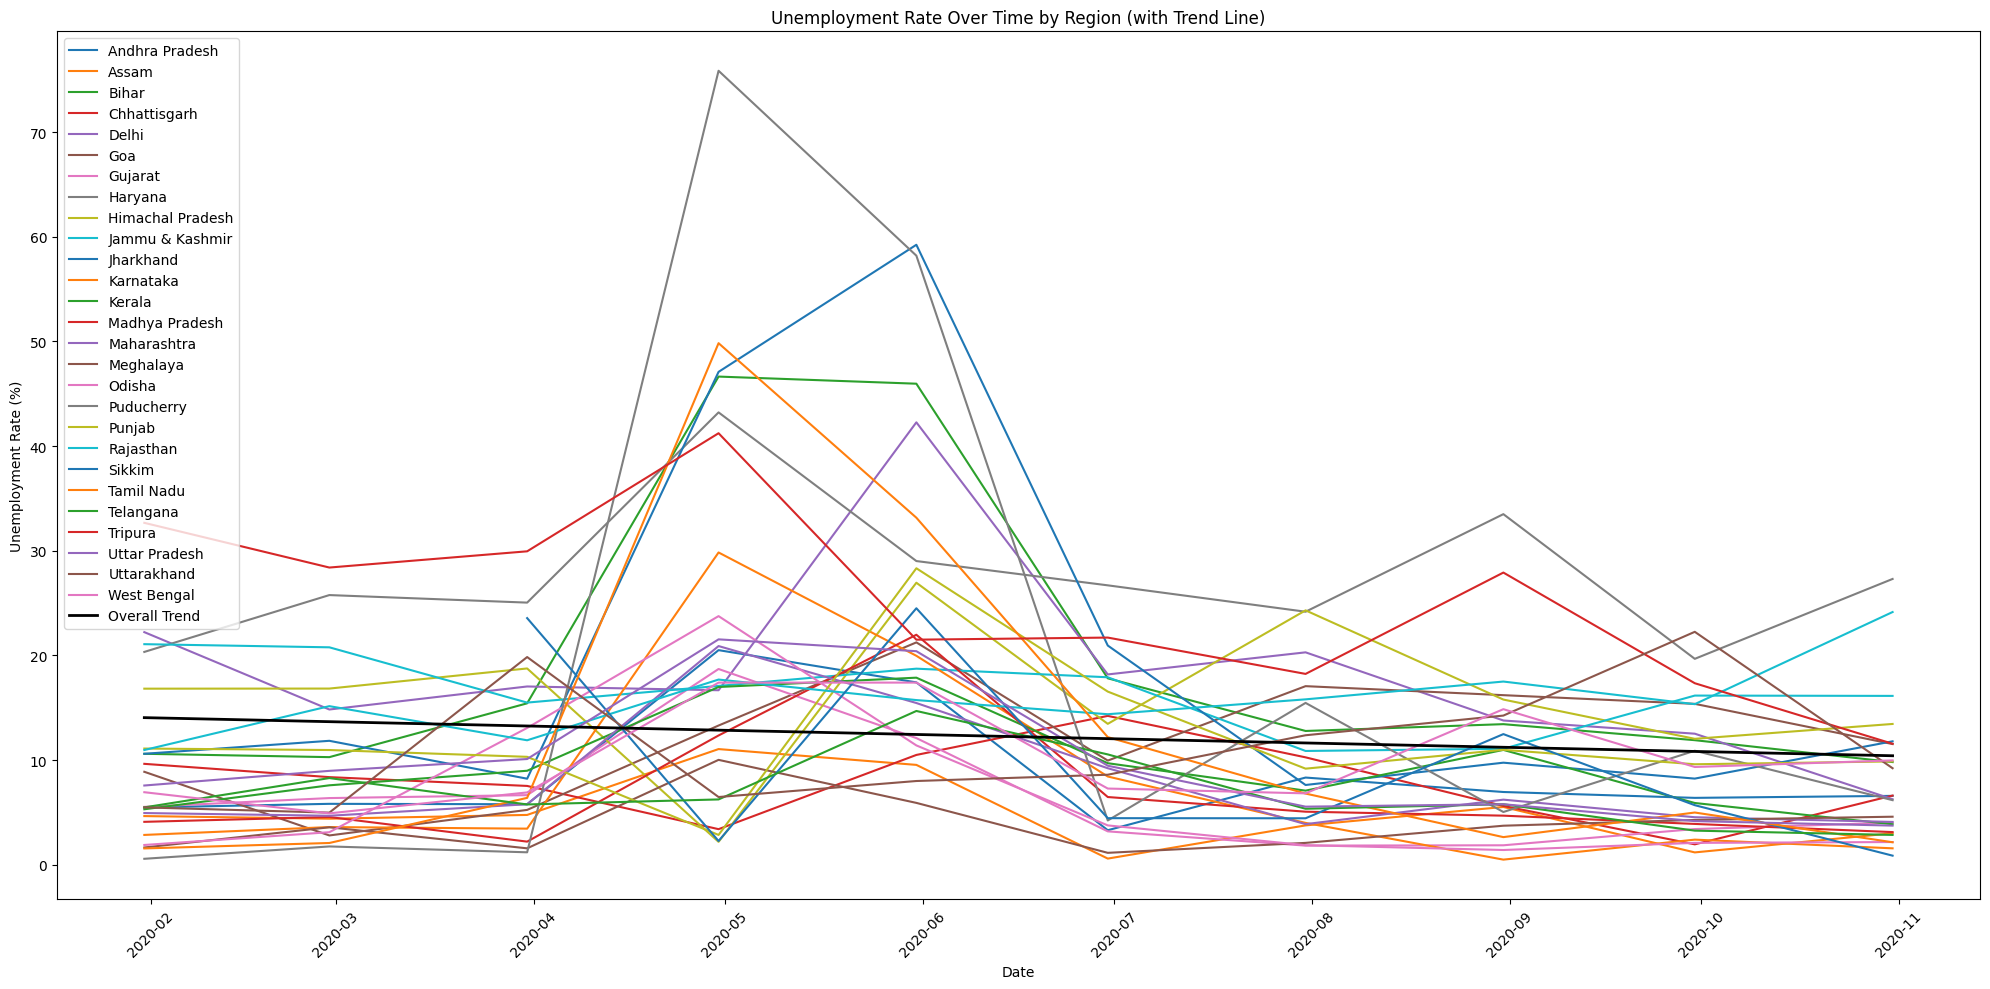

In [ ]:
avg_df = employment.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean().reset_index()

avg_df['date_ordinal'] = avg_df[' Date'].map(pd.Timestamp.toordinal)

slope, intercept = np.polyfit(avg_df['date_ordinal'], avg_df[' Estimated Unemployment Rate (%)'], 1)
trend_line = slope * avg_df['date_ordinal'] + intercept

plt.figure(figsize=(20, 10))
sns.lineplot(data=employment, x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region', palette='tab10')

plt.plot(avg_df[' Date'], trend_line, color='black', linewidth=2, label='Overall Trend')

plt.title('Unemployment Rate Over Time by Region (with Trend Line)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



*  Below code filters the dataset for the period from March to July 2020 and creates a bar plot showing unemployment rates during that time to visualize the impact of COVID-19 on unemployment.




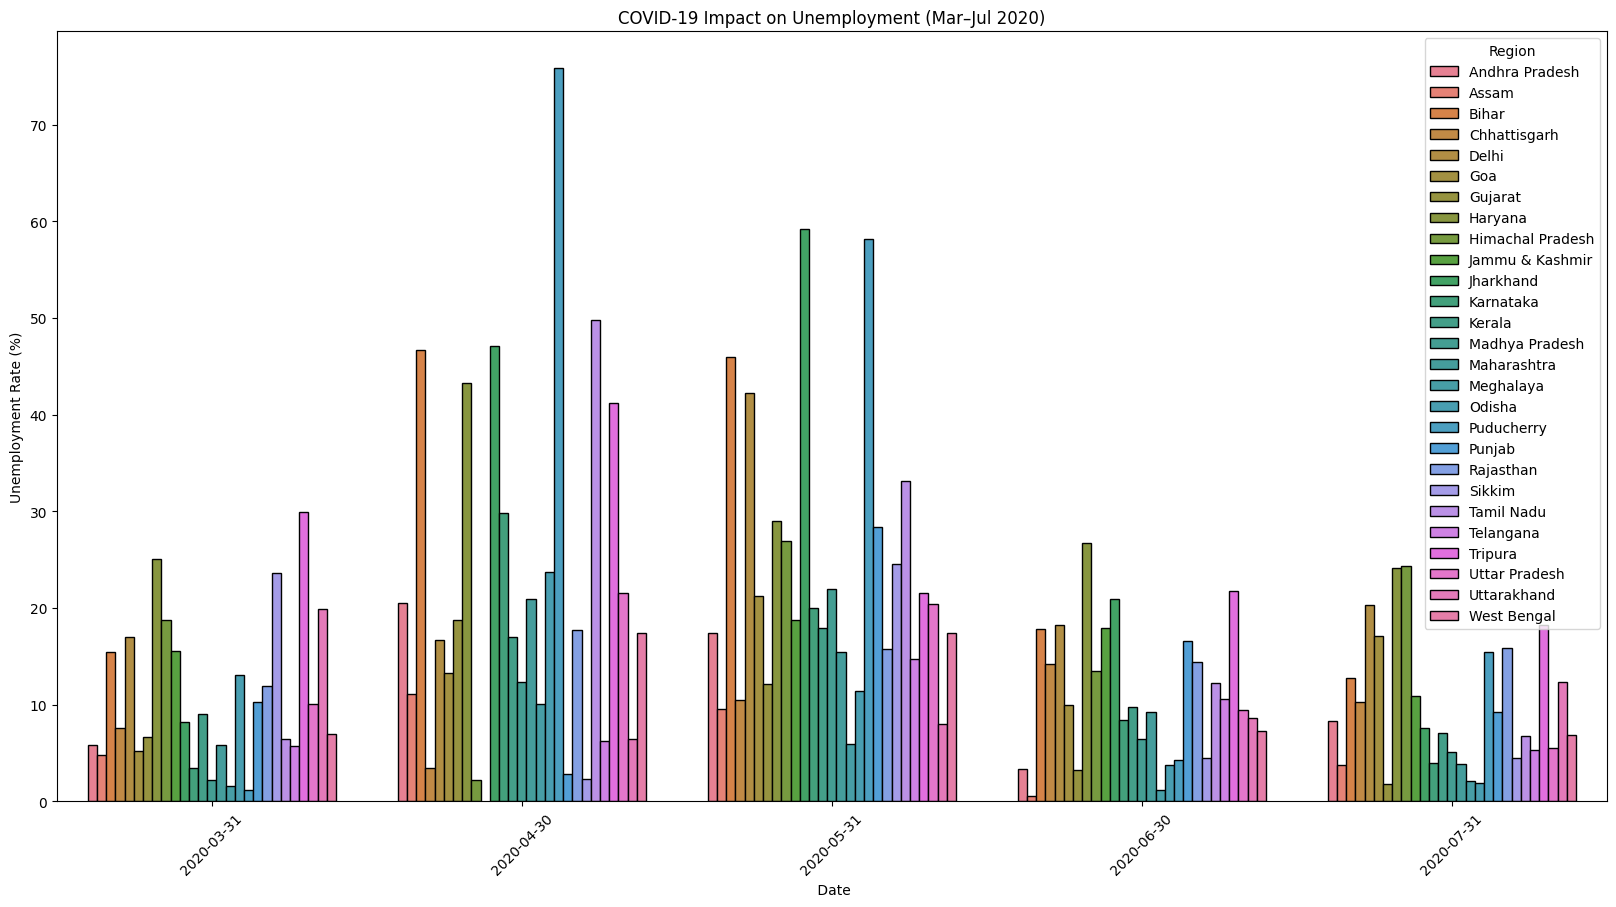

In [ ]:
covid_df = employment[(employment[' Date'] >= '2020-03-01') & (employment[' Date'] <= '2020-07-31')]

plt.figure(figsize=(20,10))
barplot = sns.barplot(data=covid_df, x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region',edgecolor='black')
plt.title('COVID-19 Impact on Unemployment (Mar–Jul 2020)')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()



*   This code computes the monthly average unemployment rate for each region, reshapes the data into a matrix format, and visualizes it as a heatmap to show how unemployment rates vary across regions and months.



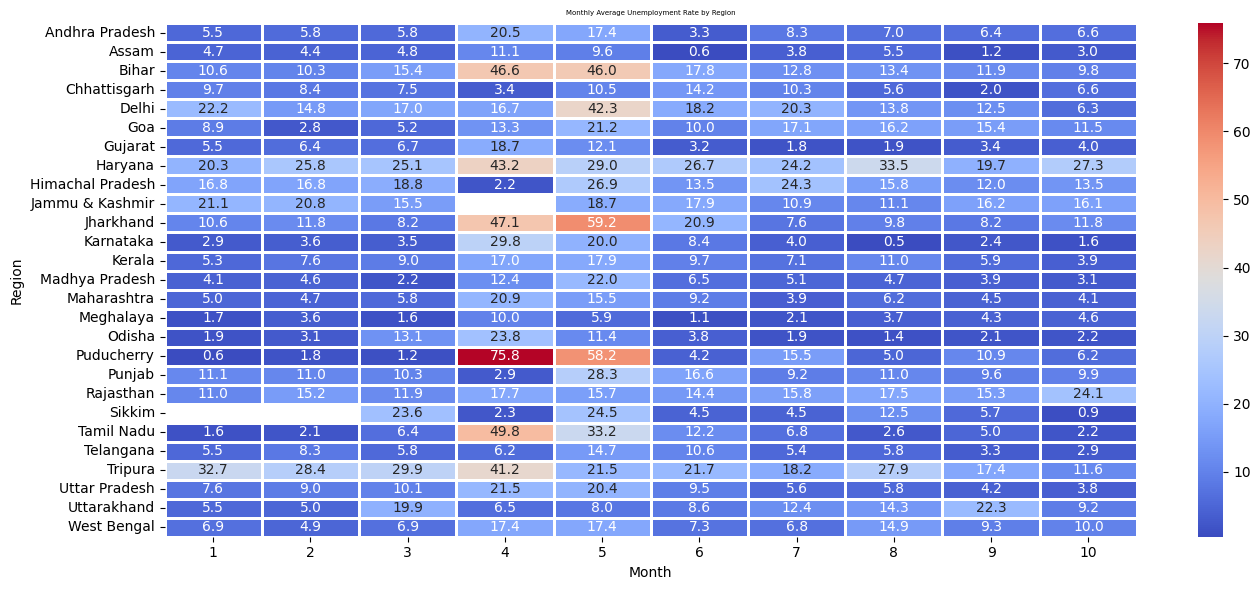

In [ ]:
employment['Month'] = employment[' Date'].dt.month
monthly_avg = employment.groupby(['Region', 'Month'])[' Estimated Unemployment Rate (%)'].mean().reset_index()

heatmap_data = monthly_avg.pivot(index='Region', columns='Month', values=' Estimated Unemployment Rate (%)')

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', linewidths=1.0)
plt.title("Monthly Average Unemployment Rate by Region", fontsize=5)
plt.xlabel("Month")
plt.ylabel("Region")
plt.tight_layout()
plt.show()



*   This code identifies the top 6 regions with the highest average unemployment rates, individual bar plots are used to show monthly unemployment trends for each of those regions,
* This helps visualize seasonal patterns and regional differences.



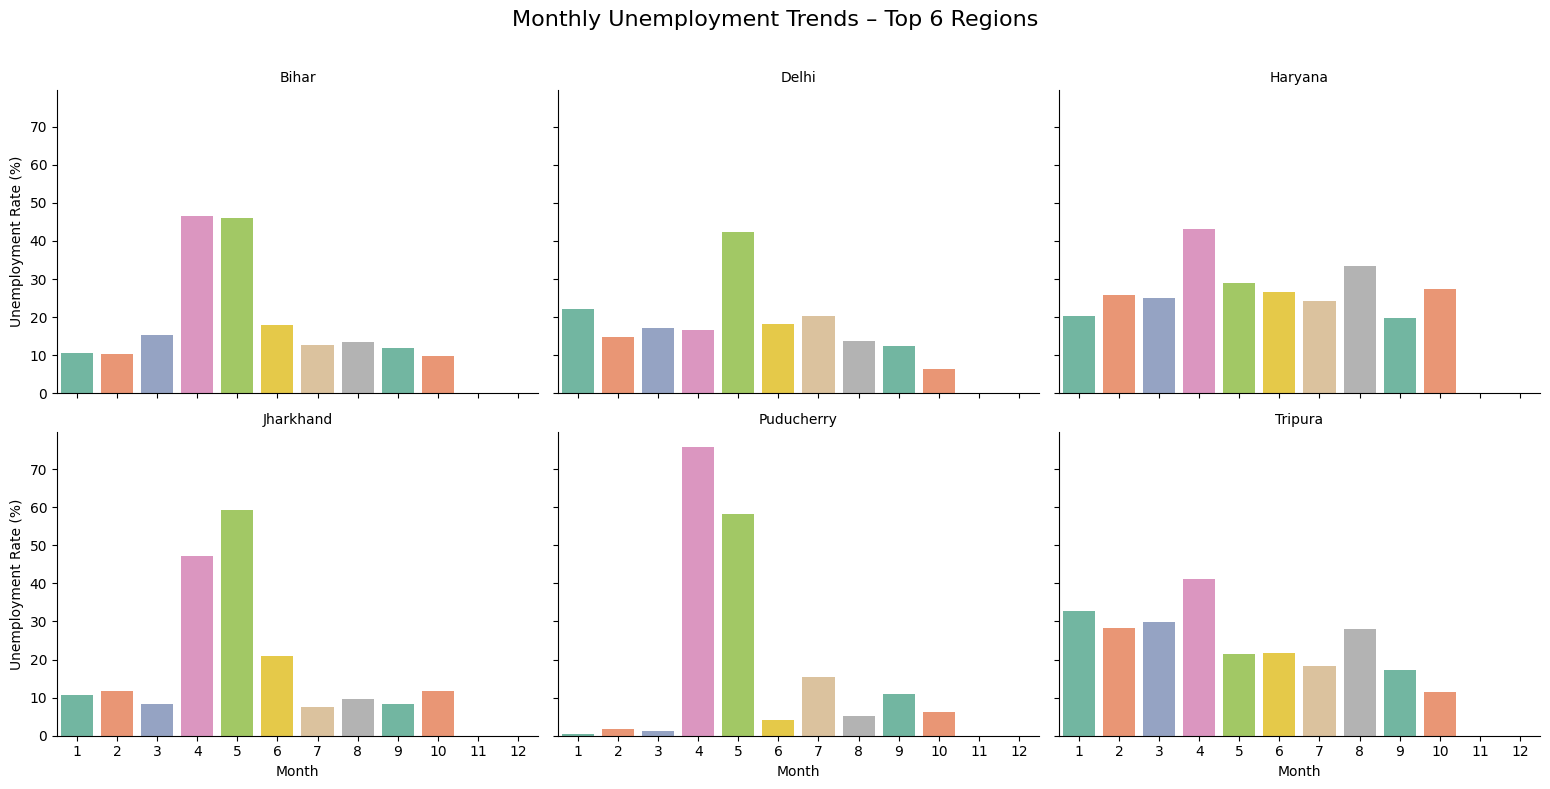

In [ ]:
employment['Month'] = employment[' Date'].dt.month
employment['Year'] = employment[' Date'].dt.year

employment.rename(columns={' Estimated Unemployment Rate (%)': ' Unemployment Rate'}, inplace=True)

top_regions = employment.groupby('Region')[' Unemployment Rate'].mean().sort_values(ascending=False).head(6).index
top_region_data = employment[employment['Region'].isin(top_regions)]

g = sns.FacetGrid(top_region_data, col='Region', col_wrap=3, height=4, aspect=1.3)
g.map_dataframe( sns.barplot, x='Month', y=' Unemployment Rate', hue='Month', palette='Set2', order=range(1, 13), legend=False)

g.set_titles("{col_name}")
g.set_axis_labels("Month", "Unemployment Rate (%)")
g.fig.suptitle("Monthly Unemployment Trends – Top 6 Regions", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()



*   This code calculates the average unemployment rate for each month across all regions and years, then plots it as a line chart to reveal seasonal trends in unemployment rates throughout the year.




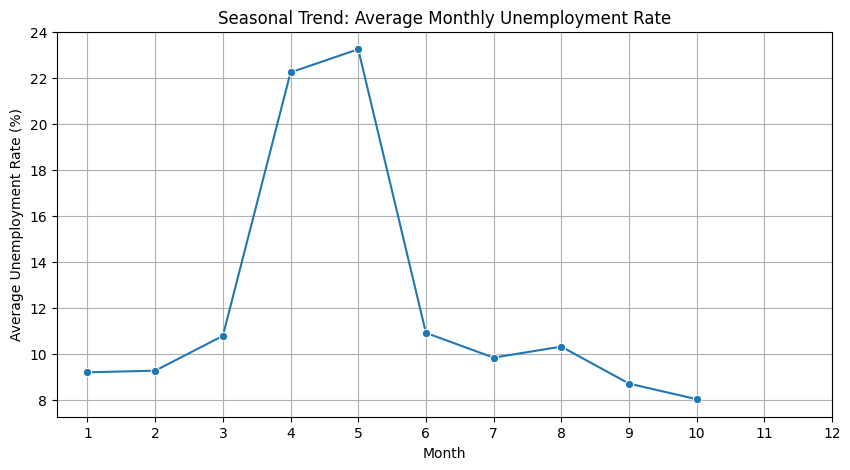

In [ ]:
employment['Month'] = pd.to_datetime(employment[' Date']).dt.month
monthly_avg = employment.groupby('Month')[' Unemployment Rate'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title('Seasonal Trend: Average Monthly Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

**x===========================================================================================================x**